In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Mushroom Classification and EDA

## Table of contents

- Loading the dataset and checking its correctness

- Exploratory Data Analysis

- Data preprocessing

- Split dataset to train and test parts

- Training with RandomForestClassifier

- Tuning hyper-parameters with GridSearchCV

- Evaluating the trained model

- Some suggestions of next steps

### Loading the dataset and checking its correctness

In [3]:
df = pd.read_csv('dataset/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


This dataset contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981).

All mushrooms in this dataset were divided into two classes: p-poisoned, e-edible. The main task is to predict is mushroom poisoned or not.

Let's check the correctness of dataset

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null cells

Create a dict with all features to represent whole words instead of short names

In [5]:
features = {'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
            'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
            'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink',
                          'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
            'bruises': {'t': 'bruises', 'f': 'no'},
            'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none',
                     'p': 'pungent', 's': 'spicy'},
            'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
            'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'}, 'gill-size': {'b': 'broad', 'n': 'narrow'},
            'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green',
                           'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
            'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
            'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted',
                           '?': 'missing'},
            'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
            'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
            'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange',
                                       'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
            'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange',
                                       'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
            'veil-type': {'p': 'partial', 'u': 'universal'},
            'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
            'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
            'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant',
                          's': 'sheathing', 'z': 'zone'},
            'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green',
                                  'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
            'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several',
                           'y': 'solitary'},
            'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste',
                        'd': 'woods'}}

As we can see - some parameters of `stalk-root` were missed, let's replace them with the most frequent one - `bulbous`

In [6]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [7]:
df['stalk-root'].replace(['?'], 'b', inplace=True)
df['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

Let's delete unused parameters of `stalk-root` feature

In [8]:
features['stalk-root'] = {'b': 'bulbous', 'c': 'club', 'e': 'equal', 'r': 'rooted'}

### Exploratory Data Analysis

Divide features by entities for 7 groups, to check distribution of edible and poisoned mushrooms

In [9]:
f_groups = {
    'cap': ['cap-shape', 'cap-surface', 'cap-color'],  # Cap features
    'gill': ['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color'],  # Gill features
    'stalk': ['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
              'stalk-color-above-ring', 'stalk-color-below-ring'],  # Stalk features
    'veil': ['veil-type', 'veil-color'],  # Veil features
    'ring': ['ring-number', 'ring-type'],  # Ring features
    'habitat': ['population', 'habitat'],  # Habitat features
    'other': ['spore-print-color', 'bruises', 'odor']  # Other features
}

Create a function to visualize distribution between edible and poison mushrooms in each group.

Edible will be green, and poison will be red.

In [10]:
def plot_col(col, ax_p, hue=None, labels=None):
    color = ['red', 'green']
    splot = sns.countplot(x=col, hue=hue, palette=color, data=df, ax=ax_p)
    ax_p.set(xlabel=f"{col.title()}", ylabel="Quantity")
    if labels is not None:
        ax_p.set_xticklabels([labels[i] for i in df[col].unique()])
    if hue is not None:
        ax_p.legend(('Poisonous', 'Edible'), loc=0)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

In [11]:
from copy import copy


def indices(rows, cols):
    ind = []
    for i in range(rows):
        for j in range(cols):
            ind.append((i, j))
    return ind


def plot_group(cols: list):
    if len(cols) > 2:
        rows_num = 2
        cols_num = round(len(cols) / rows_num)
    else:
        rows_num = 1
        cols_num = len(cols)
    fig, ax = plt.subplots(rows_num, cols_num, figsize=(20, 12))
    ind = indices(rows_num, cols_num)
    copy_cols = copy(cols)
    for i in ind:
        if not len(copy_cols):
            break
        entity = copy_cols.pop(-1)
        if len(cols) > 2:
            plot_col(entity, ax_p=ax[i[0]][i[1]], hue='class', labels=features[entity])
        else:
            plot_col(entity, ax_p=ax[i[1]], hue='class', labels=features[entity])

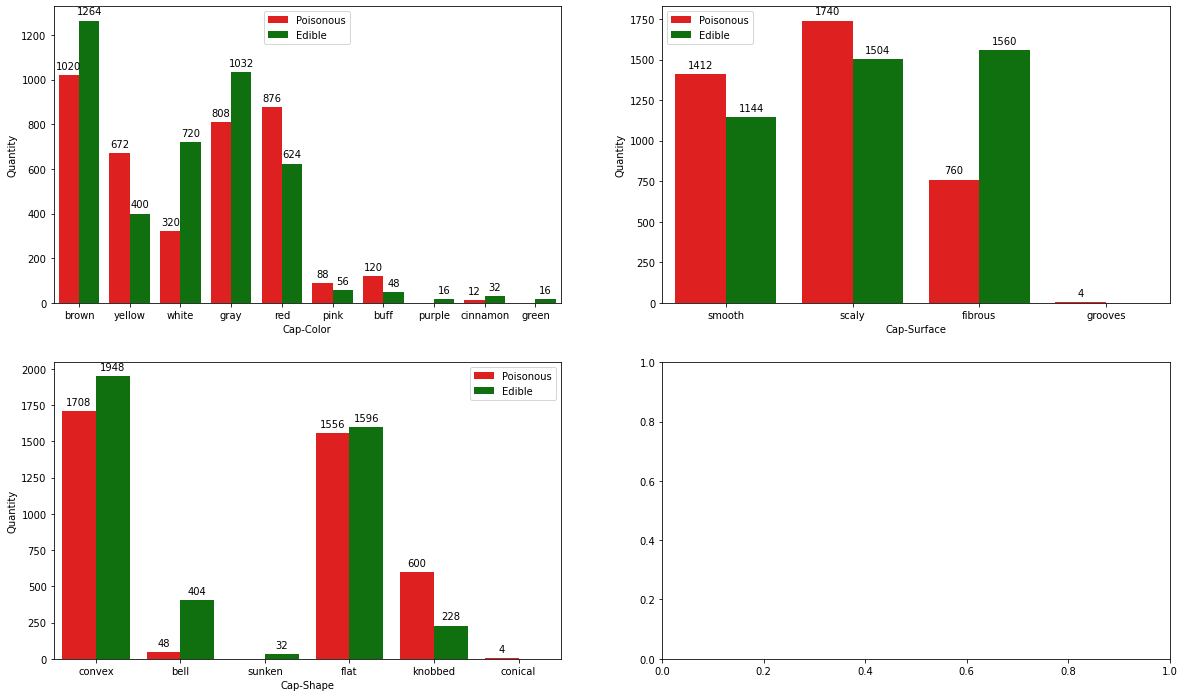

In [12]:
plot_group(f_groups['cap'])

The Figure above represents the distribution of the Mushrooms by their Classes and Cap features. According to this graph, we can make some interesting conclusions, for example - all mushrooms with green or purple cap are edible.

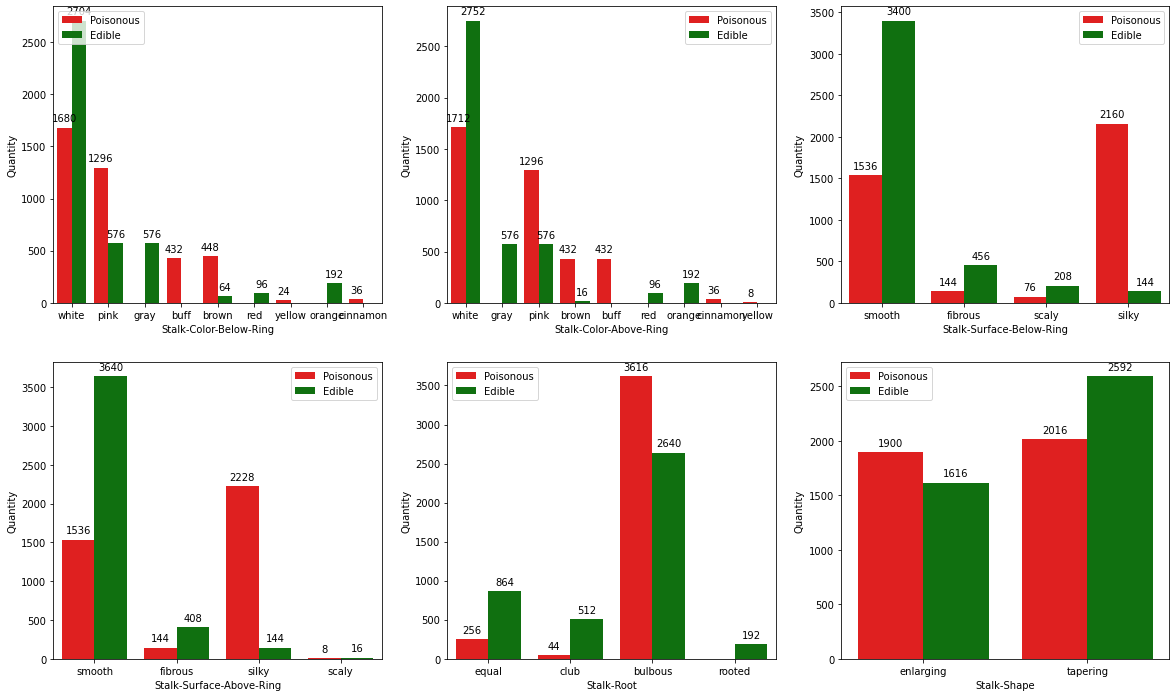

In [13]:
plot_group(f_groups['stalk'])

There are some figures that demonstrated the distribution between edible and poisoned mushrooms by stalk features. As we can see - some counts of features may be duplicated (ex. - gray and pink stalk-color-below-ring). It means that the dataset cen be created manually.

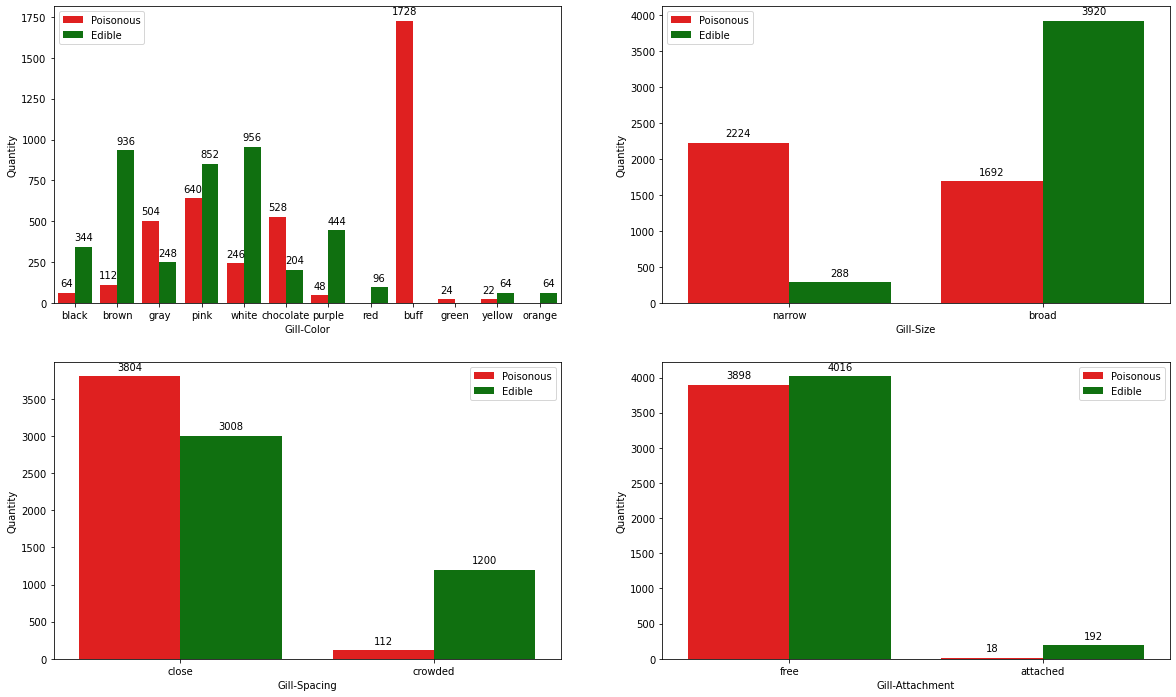

In [14]:
plot_group(f_groups['gill'])

Another interesting fact - if you see mushroom with buff gill - it is exactly poisoned one!

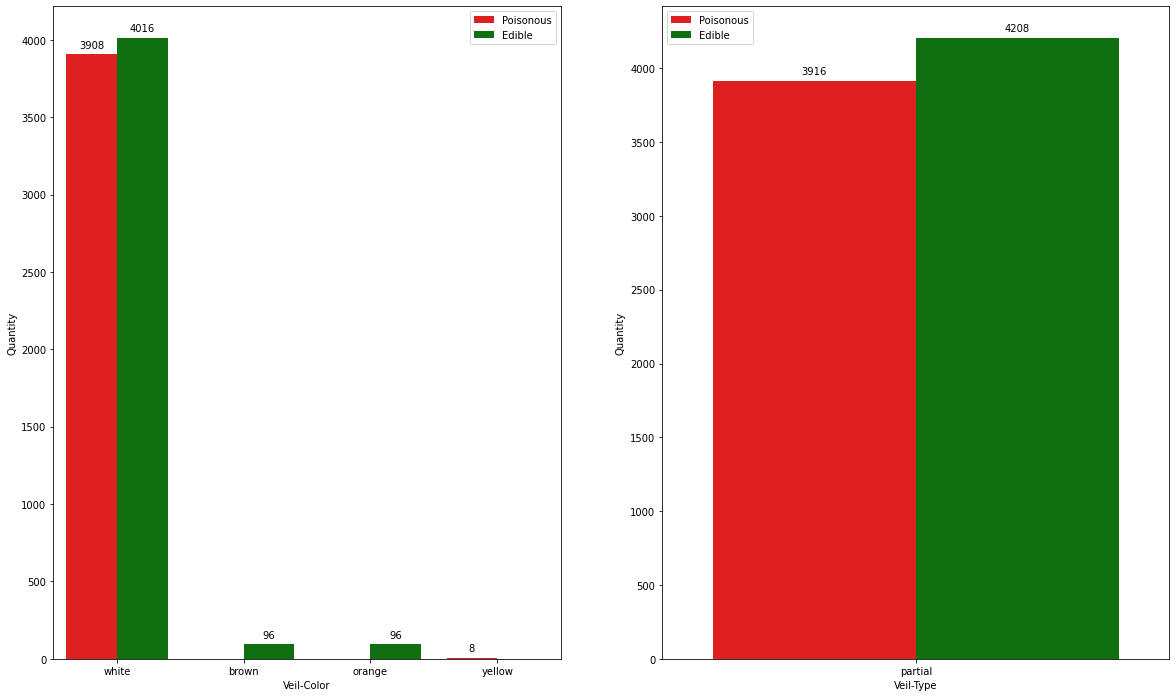

In [15]:
plot_group(f_groups["veil"])

Some figures grouped by veil feature. By the white color of the veil, it is impossible to predict whether the mushroom is poisonous.

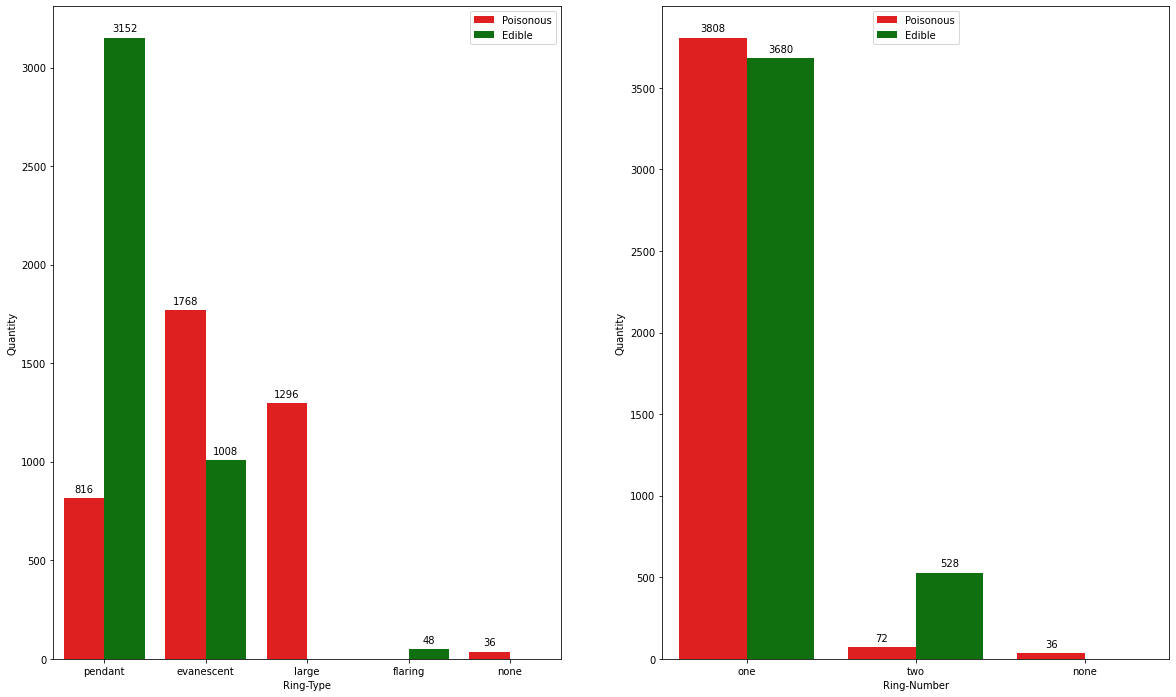

In [16]:
plot_group(f_groups["ring"])

If you see large ring - probably that mushroom is not edible!

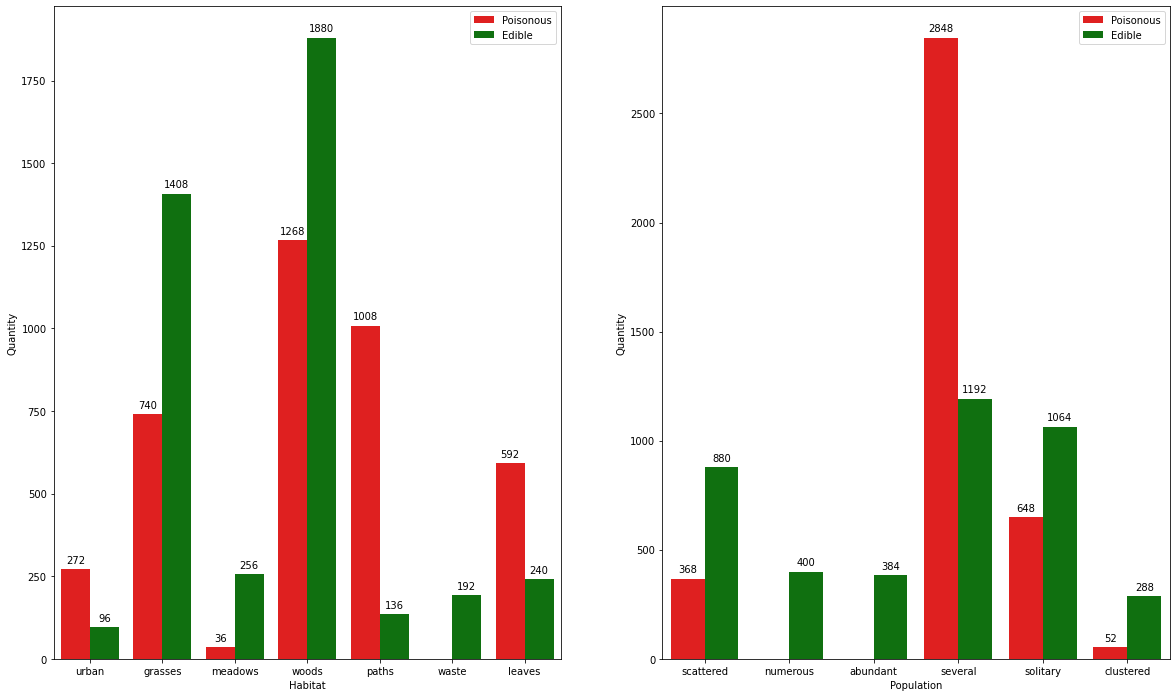

In [17]:
plot_group(f_groups["habitat"])

Don`t try to pick mushrooms from paths or leaves - they can be poisoned!

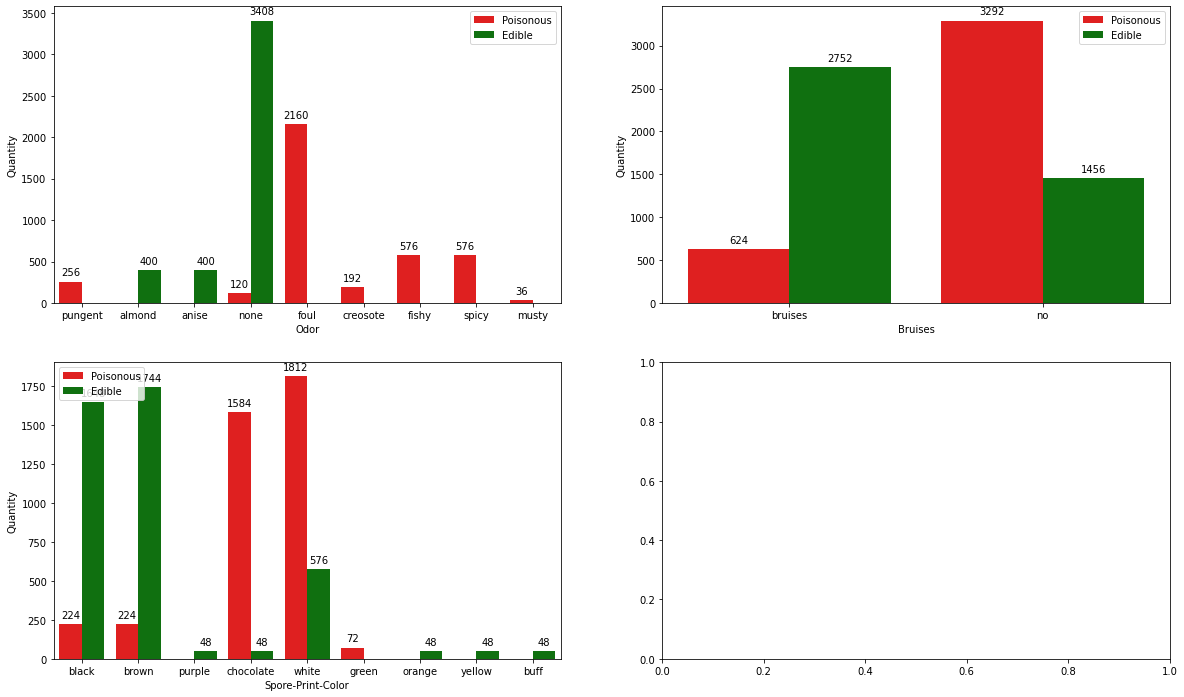

In [18]:
plot_group(f_groups["other"])

As we can see above - some features also have similar counts.

### Data preprocessing

Encode class feature to numeric value.

In [19]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(df[['class']])
df[['class']] = enc.fit_transform(df[['class']])

Create a sparse matrix of all features.

In [20]:
df = pd.get_dummies(df)
df.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1.0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0.0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1.0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


### Split dataset to train and test parts

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=['class']), df[['class']],
                                                    random_state=42, train_size=0.8)
X_train.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7873,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
6515,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
6141,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2764,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
438,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Training with RandomForestClassifier

Use RandomForestClassifier to train a model and GridSearchCV to find the best parameters.

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1)

### Tuning hyper-parameters with GridSearchCV

In [23]:
from numpy import ravel
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 6, 8]
}
rf_search = GridSearchCV(rf, params)
rf_search.fit(X_train, ravel(Y_train))

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [4, 6, 8],
                         'n_estimators': [50, 100, 150, 200]})

### Evaluating the trained model

In [24]:
rf_search.best_params_

{'max_depth': 8, 'n_estimators': 50}

In [25]:
rf_search.best_score_

1.0

Such a strange result, but as far as I understand while reading discussion on kaggle - this dataset probably has such values.

In [26]:
pred = rf_search.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(pred, Y_test.values)

array([[843,   0],
       [  0, 782]])

According to performance measurement of the model -model performed 100% accuracy, so we see a "perfect" confusion matrix for the test dataset.

### Some suggestions of next steps

I think it will be fascinating to analyze the correlations between features, and find with features don`t have an influence on model.